In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import tensorflow as tf
import numpy as np
from IMNN.IMNN import IMNN
import matplotlib.pyplot as plt

In [3]:
n_batches = 10
n_s = 1000
n_d = 100

n_params = 1
n_summaries = 1
input_shape = (10,)

In [4]:
#n_batches = 10
#n_s = 1000
#n_d = 100
#
#n_params = 2
#n_summaries = 2
#input_shape = (10,)

In [5]:
imnn = IMNN(n_params, n_summaries, n_s, n_d)

Using different datasets for fiducial and derivativesimulations


In [6]:
θ_fid = np.array([1.])
δθ = np.array([0.1])

In [7]:
#θ_fid = np.array([0., 1.])
#δθ = np.array([0.1, 0.1])

In [8]:
seed = np.random.randint(1e6)
np.random.seed(seed)
s = np.random.normal(0., np.sqrt(θ_fid[0]), (n_s * n_batches,) + input_shape)
np.random.seed(seed)
s_a_m = np.random.normal(0., np.sqrt(θ_fid[0] - δθ[0]), (n_d * n_batches, 1, 1) + input_shape) 
np.random.seed(seed)
s_a_p = np.random.normal(0., np.sqrt(θ_fid[0] + δθ[0]), (n_d * n_batches, 1, 1) + input_shape)
ds_dθ_num = np.concatenate([s_a_m, s_a_p], axis=1)
ds_dθ = (ds_dθ_num[:, 1] - ds_dθ_num[:, 0]) / (2. * δθ[np.newaxis, :, np.newaxis])

In [9]:
#seed = np.random.randint(1e6)
#np.random.seed(seed)
#s = np.random.normal(θ_fid[0], np.sqrt(θ_fid[1]), (n_s * n_batches,) + input_shape)
#np.random.seed(seed)
#s_a_m = np.random.normal(θ_fid[0] - δθ[0], np.sqrt(θ_fid[1]), (n_d * n_batches, 1) + input_shape) 
#np.random.seed(seed)
#s_a_p = np.random.normal(θ_fid[0] + δθ[0], np.sqrt(θ_fid[1]), (n_d * n_batches, 1) + input_shape)
#np.random.seed(seed)
#s_b_m = np.random.normal(θ_fid[0], np.sqrt(θ_fid[1] - δθ[1]), (n_d * n_batches, 1) + input_shape)
#np.random.seed(seed)
#s_b_p = np.random.normal(θ_fid[0], np.sqrt(θ_fid[1] + δθ[1]), (n_d * n_batches, 1) + input_shape)
#ds_dθ_num = np.concatenate([np.concatenate([s_a_m, s_b_m], axis=1)[:, np.newaxis, ...],
#                            np.concatenate([s_a_p, s_b_p], axis=1)[:, np.newaxis, ...]],
#                           axis=1)
#ds_dθ = (ds_dθ_num[:, 1] - ds_dθ_num[:, 0]) / (2. * δθ[np.newaxis, :, np.newaxis])

In [10]:
seed = np.random.randint(1e6)
np.random.seed(seed)
test_s = np.random.normal(0., np.sqrt(θ_fid[0]), (n_s * n_batches,) + input_shape)
np.random.seed(seed)
test_s_a_m = np.random.normal(0., np.sqrt(θ_fid[0] - δθ[0]), (n_d * n_batches, 1, 1) + input_shape) 
np.random.seed(seed)
test_s_a_p = np.random.normal(0., np.sqrt(θ_fid[0] + δθ[0]), (n_d * n_batches, 1, 1) + input_shape)
test_ds_dθ_num = np.concatenate([test_s_a_m, test_s_a_p], axis=1)
test_ds_dθ = (test_ds_dθ_num[:, 1] - test_ds_dθ_num[:, 0]) / (2. * δθ[np.newaxis, :, np.newaxis])

In [11]:
#seed = np.random.randint(1e6)
#np.random.seed(seed)
#test_s = np.random.normal(θ_fid[0], np.sqrt(θ_fid[1]), (n_s,) + input_shape)
#np.random.seed(seed)
#test_s_a_m = np.random.normal(θ_fid[0] - δθ[0], np.sqrt(θ_fid[1]), (n_d, 1) + input_shape)
#np.random.seed(seed)
#test_s_a_p = np.random.normal(θ_fid[0] + δθ[0], np.sqrt(θ_fid[1]), (n_d, 1) + input_shape)
#np.random.seed(seed)
#test_s_b_m = np.random.normal(θ_fid[0], np.sqrt(θ_fid[1] - δθ[1]), (n_d, 1) + input_shape)
#np.random.seed(seed)
#test_s_b_p = np.random.normal(θ_fid[0], np.sqrt(θ_fid[1] + δθ[1]), (n_d, 1) + input_shape)
#test_ds_dθ_num = np.concatenate([np.concatenate([test_s_a_m, test_s_b_m], axis=1)[:, np.newaxis, ...],
#                                 np.concatenate([test_s_a_p, test_s_b_p], axis=1)[:, np.newaxis, ...]],
#                                axis=1)
#test_ds_dθ = (test_ds_dθ_num[:, 1] - test_ds_dθ_num[:, 0]) / (2. * δθ[np.newaxis, :, np.newaxis])

In [12]:
model = tf.keras.Sequential(
    [tf.keras.Input(shape=(10,)),
     tf.keras.layers.Dense(128),
     tf.keras.layers.Activation("tanh"),
     tf.keras.layers.Dense(128),
     tf.keras.layers.Activation("tanh"),
     tf.keras.layers.Dense(n_summaries),
     tf.keras.layers.Activation("tanh")
    ])
opt = tf.keras.optimizers.Adam()

In [13]:
imnn.set_model(model, opt)

Checking is not currently done on the model. Make sure that its output has shape (None, 1) for the fiducial values a nd (None, 2, 1, 1) for the derivative values.


In [14]:
imnn.setup_dataset(θ_fid, s, ds_dθ_num, δθ=δθ)
#imnn.setup_dataset(θ_fid, test_s, test_ds_dθ_num, δθ=δθ, train=False)

In [15]:
imnn.set_regularisation_strength(0.1, 10.)

In [17]:
imnn.fit(1000, validate=False)

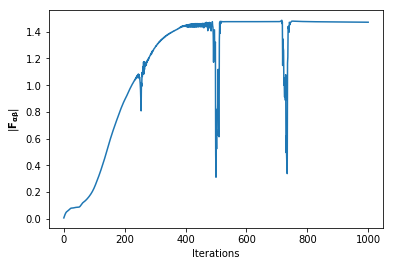

In [18]:
plt.plot(imnn.history["det_F"])
plt.plot(imnn.history["val_det_F"])
plt.xlabel("Iterations")
plt.ylabel(r"$|{\bf F_{\alpha\beta}}|$");

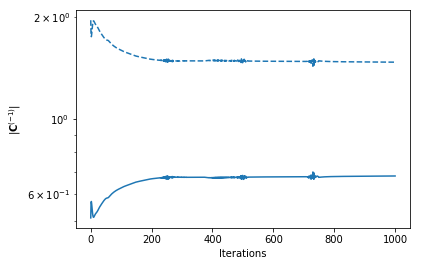

In [19]:
plt.plot(imnn.history["det_C"], color="C0")
plt.plot(imnn.history["det_Cinv"], color="C0", linestyle="dashed")
plt.plot(imnn.history["val_det_C"], color="C1")
plt.plot(imnn.history["val_det_Cinv"], color="C1", linestyle="dashed")
plt.yscale("log")
plt.xlabel("Iterations")
plt.ylabel(r"$|{\bf C}^{(-1)}|$");

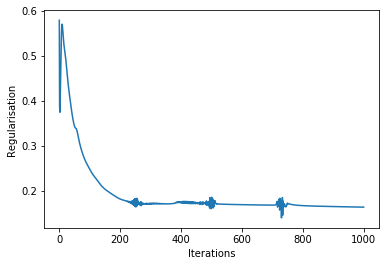

In [20]:
plt.plot(imnn.history["reg"])
plt.plot(imnn.history["val_reg"])
plt.xlabel("Iterations")
plt.ylabel(r"Regularisation");

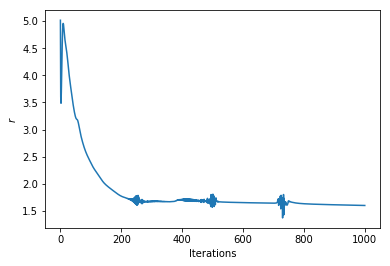

In [21]:
plt.plot(imnn.history["r"])
plt.plot(imnn.history["val_r"])
plt.xlabel("Iterations")
plt.ylabel(r"$r$");

In [46]:
imnn.setup_MLE(dataset=False, θ_fid=imnn.θ_fid, d=next(iter(imnn.dataset)), dd_dθ=next(iter(imnn.derivative_dataset)), δθ=δθ)

In [52]:
imnn.get_MLE(np.random.normal(0, 1, (1,)+input_shape))

<tf.Tensor: id=21929, shape=(1, 1), dtype=float32, numpy=array([[0.53522754]], dtype=float32)>